In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
# Load Stata data
data = pd.io.stata.read_stata('/Users/jamiezeng/us_job_market_discrimination.dta')


In [7]:
# number of callbacks for black-sounding names
print('Number of Callbacks for Black-sounding names', sum(data[data.race == 'b'].call))
print('Number of Callbacks for White-sounding names', sum(data[data.race == 'w'].call))

Number of Callbacks for Black-sounding names 157.0
Number of Callbacks for White-sounding names 235.0


In [11]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [31]:
#Calculate the number of callbacks & no callbacks for black & white sounding names
black_white_callback = data.groupby(['race', 'call']).size().unstack('race')
black_white_callback.columns = ['Black', 'White'] #Name the columns

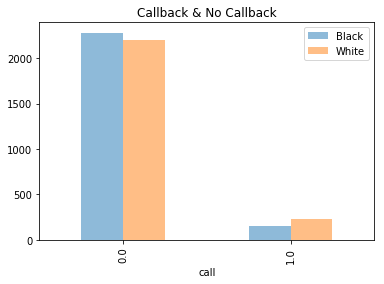

In [32]:
import matplotlib.pyplot as plt
_ = black_white_callback.plot.bar(title = 'Callback & No Callback', alpha = 0.5) 
plt.show()

In [33]:
print(black_white_callback)

      Black  White
call              
0.0    2278   2200
1.0     157    235


In [34]:
#Calculate the probability of callbacks for black sounding names 
black = data.loc[(data['race'] == 'b'), 'call']
bk_cb = black.sum() / len(black)
bk_no_cb = 1 - bk_cb


#Calculate the probability of callbacks for white sounding names
white = data.loc[(data['race'] == 'w'), 'call']
wt_cb = white.sum()/len(white)
wt_no_cb= 1 - wt_cb


#Overall sample proportion
pool_sample = (len(white)*wt_cb + len(black)*bk_cb) / len(data) 

#Standard error of callbacks for both groups
SE = np.sqrt(pool_sample*(1-pool_sample)*(1/len(white)+1/len(black)))

#Z-score
z = (wt_cb - bk_cb)/ SE


print('Overall sample proportion:   ', pool_sample)
print('Standard error of callbacks: ', SE)
print('Z-score:                     ', z)

#Margin of error
margin_error = 1.96*SE

#Confidence of Interval
CI = [(wt_cb - bk_cb) - 1.96*SE, (wt_cb - bk_cb) + 1.96*SE]

#P-value
from scipy.stats import norm
p_values = norm.sf(abs(z))*2 #two-tailed


print('Margin of error:         ' , margin_error)
print('95% Confidence Interval: ' , CI)
print('P-value:                 ' , p_values)

print('Probability of callbacks for Group1:   ', bk_cb)
print('Probability of no callback for Group1: ', bk_no_cb)
print('\n')
print('Probability of callbacks for Group2:   ', wt_cb)
print('Probability of no callback for Group2: ', wt_no_cb)

Overall sample proportion:    0.08049281314168377
Standard error of callbacks:  0.007796894036170457
Z-score:                      4.108412152434346
Margin of error:          0.015281912310894095
95% Confidence Interval:  [0.01675094189855149, 0.04731476652033968]
P-value:                  3.983886837585077e-05
Probability of callbacks for Group1:    0.06447638603696099
Probability of no callback for Group1:  0.935523613963039


Probability of callbacks for Group2:    0.09650924024640657
Probability of no callback for Group2:  0.9034907597535934
